# Script to run a restart
This script run the model from a rest state during 10 years in order to produce a restart start.

In [1]:
## Import package
from neuralsw.model.shalw import SWmodel
import neuralsw
import numpy as np
import xarray as xr
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib notebook


In [2]:
## Specify the output
PLOT = True #if plot is wanted

#rootdir
rootdir = os.path.realpath(\
	os.path.join(os.getcwd(),'../..'))

#directory to store the data
datadir = os.path.realpath(os.path.join(rootdir,'data'))

#savefile (to check the run)
outname = os.path.join(datadir,'restartrun.nc')

#restartfile
rstfile = os.path.join(datadir,'restart_10years.nc')

#Duration of the integration
endtime = 48*30*12*10 #10 years

print('data directory:',datadir)


data directory: /net/argos/data/parvati/jbrlod/jbrlod/these/postdoc/collaborations/bigdata/sw/data


In [3]:
## Init model
SW = SWmodel(nx=80,ny=80)
SW.initstate_cst(0,0,0)

#Save every month
SW.save(time=np.arange(0,endtime,48*30),name=outname)

In [4]:
# run the model
for i in tqdm(range(endtime)):
    SW.next()

100%|██████████| 17280/17280 [00:26<00:00, 664.42it/s]


In [5]:
# Save the restart
SW.save_rst(rstfile)


/usr/home/jbrlod/data/anaconda2/envs/nn/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


<IPython.core.display.Javascript object>


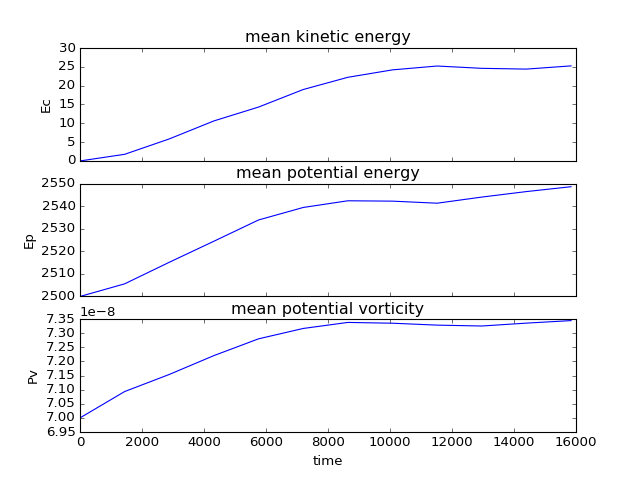

In [6]:
## Plots conservative quantities
if PLOT:
    ## For some unresolved reasons , the keras modul (included in model) should not be called before dealing with nc files
    import neuralsw.model.modeltools as model
    
    ds = xr.open_dataset(outname)

    fig,ax = plt.subplots(nrows=3,sharex=True)
    Ec = model.cinetic_ener(ds=ds)
    Ep = model.potential_ener(ds=ds)
    Pv = model.potential_vor(ds=ds)
    Ec.plot(ax=ax[0])
    Ep.plot(ax=ax[1])
    Pv.plot(ax=ax[2])
    ax[0].set_title('mean kinetic energy')
    ax[0].set_ylabel('Ec')
    ax[0].set_xlabel('')
    ax[1].set_title('mean potential energy')
    ax[1].set_ylabel('Ep')
    ax[1].set_xlabel('')
    ax[2].set_title('mean potential vorticity')
    ax[2].set_ylabel('Pv')
    plt.show()